# Time Series Analysis of Stock Market Predictions with RNN-LSTM in Python

## Discover Time Series Analysis using Long Short-Term Memory (LSTM) networks in Python and how you can use them to make stock market predictions!

### Make sure that you have all these libaries available to run the code successfully

In [14]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
import quandl as quandl

## 1. Data Understanding And Pre-Processing

### 1. Reliance Industries Limited Daily Stock Price

In [15]:
RELIANCE = quandl.get("NSE/RELIANCE", authtoken="gmN2xKGChq4zRr3b7wNm")

### 1.1 Data Exploration

#### Here you will print the data you collected in to the DataFrame. 
#### You should also make sure that the data is sorted by date, 
#### because the order of the data is crucial in time series modelling.

In [16]:
RELIANCE.reset_index(inplace=True)

In [17]:
## Shows the first 5 rows in RELIANCE Stock Data

RELIANCE.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1998-03-20,175.35,178.25,173.75,NaN,NaN,NaN,NaN
1,1998-03-23,178.50,181.00,178.50,180.20,180.20,1758700.0,3165.37
2,1998-03-24,184.00,184.90,177.50,178.00,178.70,8838650.0,15951.78
3,1998-03-25,181.50,184.60,179.00,183.50,183.85,8936250.0,16292.18
4,1998-03-26,183.85,184.25,178.75,179.25,179.45,6915150.0,12542.00


In [18]:
## shows last 5 rows in a RELIANCE Stock Data

RELIANCE.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
5152,2018-11-20,1145.0,1155.90,1130.00,1137.00,1137.40,5719901.0,65389.04
5153,2018-11-21,1137.5,1145.50,1107.05,1113.25,1112.90,7507812.0,83847.77
5154,2018-11-22,1114.5,1125.35,1100.10,1100.10,1102.85,5792568.0,64493.93
5155,2018-11-26,1109.0,1117.50,1097.40,1109.75,1109.75,6386556.0,70744.15
5156,2018-11-27,1107.9,1130.00,1105.45,1128.60,1128.20,6810228.0,76409.55


### We find the following information about the columns in a Data:

#### Date - Date for which the price is given
#### Open - Price of the stock at market open (In USD)
#### High - Highest price reached in the day
#### Low - Lowest price reached in the day
#### Close - Closing price for the day
#### Total Trade Quantity - Number of shares Traded Quantity
#### Turnover (Lacs) - total turnover

### DataSet Summary

In [19]:
### Reliance Stock data Description
RELIANCE.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,5157.000000,5157.000000,5157.000000,5156.000000,5156.000000,5.156000e+03,5156.000000
mean,871.524365,884.118800,857.666676,870.379849,870.593716,4.943619e+06,39159.395873
std,571.833076,581.724085,559.569872,570.237480,570.457124,3.471755e+06,34008.810203
min,102.600000,105.600000,99.600000,101.600000,101.300000,5.282000e+04,429.550000
25%,373.200000,380.000000,367.500000,373.500000,373.250000,2.784150e+06,17909.465000
50%,856.000000,865.900000,844.400000,854.950000,854.700000,4.070898e+06,30549.170000
75%,1048.000000,1060.000000,1035.000000,1048.237500,1047.450000,6.061353e+06,49808.245000
max,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,6.100024e+07,457043.420000


#### Data Set Dimention

In [20]:
RELIANCE.shape

(5157, 8)

#### Data Set Structure

In [21]:
#### Reliance Stock Data Structure or Information
RELIANCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 8 columns):
Date                    5157 non-null datetime64[ns]
Open                    5157 non-null float64
High                    5157 non-null float64
Low                     5157 non-null float64
Last                    5156 non-null float64
Close                   5156 non-null float64
Total Trade Quantity    5156 non-null float64
Turnover (Lacs)         5156 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 322.4 KB


#### Convert Date Column into Datatime format

In [22]:
RELIANCE.Date = pd.to_datetime(RELIANCE.Date)

#### Finding the Null Values

In [23]:
RELIANCE.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    1
Close                   1
Total Trade Quantity    1
Turnover (Lacs)         1
dtype: int64

#### The close,Last,Total Trade Quantity,Turnover columns has the null values. 
#### Let's find the rows for which the values are missing.

In [24]:
RELIANCE[RELIANCE.Close.isnull()]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1998-03-20,175.35,178.25,173.75,NaN,NaN,NaN,NaN


## Data Visualization

#### RELIANCE Closing Price Trend 

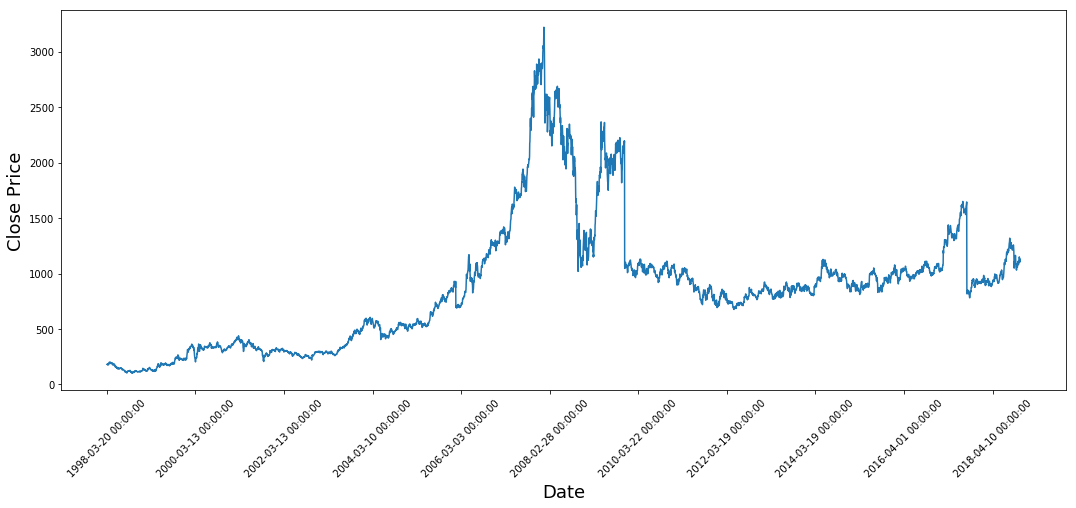

In [25]:
#### Now let's see what sort of data you have. You want data with various patterns occurring over time.
plt.figure(figsize = (18,7))
plt.plot(range(RELIANCE.shape[0]),(RELIANCE['Close']))
plt.xticks(range(0,RELIANCE.shape[0],500),RELIANCE['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

#### Mid Price using low and high price which is at most same like Closing price

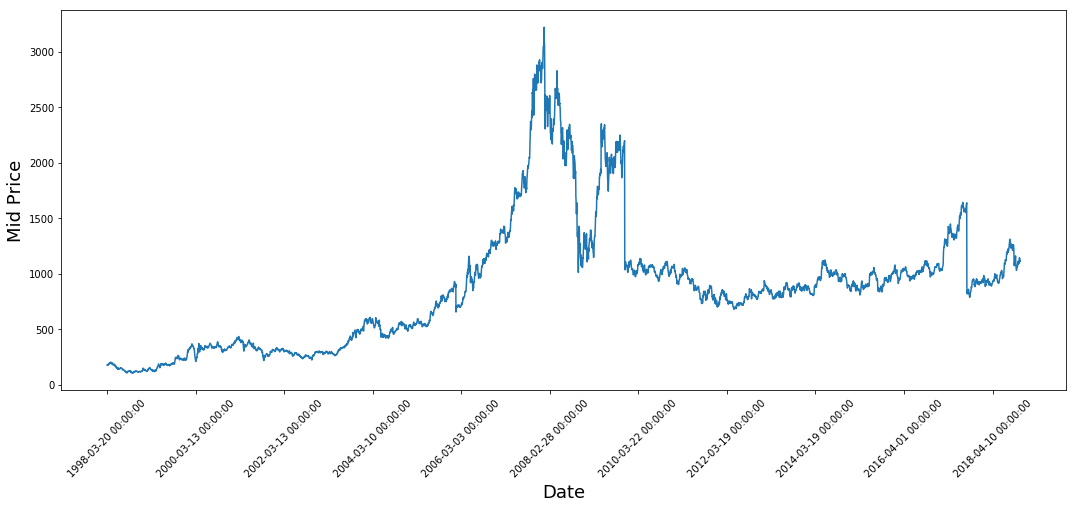

In [26]:
plt.figure(figsize = (18,7))
plt.plot(range(RELIANCE.shape[0]),(RELIANCE['Low']+RELIANCE['High'])/2.0)
plt.xticks(range(0,RELIANCE.shape[0],500),RELIANCE['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

This graph already says a lot of things. The specific reason I picked this company over others is that this graph is bursting with different behaviors of stock prices over time. This will make the learning more robust as well as give you a change to test how good the predictions are for a variety of situations.

Another thing to notice is that the values between 2006 to 2008 are much higher and fluctuate more than the values close to the 2012s to 2016 ou need to make sure that the data behaves in similar value ranges throughout the time frame. You will take care of this during the data normalization phase.

### Splitting Data into a Training set and a Test set (Sampling Data)

##### You will use the mid price calculated by taking the average of the highest and lowest recorded prices on a day.

In [ ]:
# First calculate the mid prices from the highest and lowest

high_prices = RELIANCE.loc[:,'High'].as_matrix()
low_prices = RELIANCE.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

Now you can split the training data and test data. out of 5152+ data points we will take The training data the first 4000 data points of the time series and rest will be test data. 

In [28]:
train_data = mid_prices[:4000]
test_data = mid_prices[4000:]

### Normalizing the Data
Now you need to define a scaler to normalize the data.

In [29]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [30]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 800
for di in range(0,3200,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

Reshape the data back to the shape of [data_size]

In [31]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

##### You can now smooth the data using the exponential moving average. 
##### This helps you to get rid of the inherent raggedness of the data in stock prices and produce a smoother curve.

###### Note that you should only smooth training data.

#### Now perform exponential moving average smoothing

In [32]:

# So the data will have a smoother curve than the original ragged data

EMA = 0.0
gamma = 0.1
for ti in range(4000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

    
# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

### One-Step Ahead Prediction via Averaging

Averaging mechanisms allow you to predict (often one time step ahead) by representing the future stock price as an average of the previously observed stock prices. Doing this for more than one time step can produce quite bad results. 
You will look at two averaging techniques below; 
standard averaging and exponential moving average. You will evaluate both qualitatively (visual inspection) and quantitatively (Mean Squared Error) the results produced by the two algorithms.

The Mean Squared Error (MSE) can be calculated by taking the Squared Error between the true value at one step ahead and the predicted value and averaging it over all the predictions.



### Standard Average

You can understand the difficulty of this problem by first trying to model this as an average calculation problem. First you will try to predict the future stock market prices (for example, xt+1) as an average of the previously observed stock market prices within a fixed size window (for example, xt-N, ..., xt) (say previous 100 days). Thereafter you will try a bit more fancier "exponential moving average" method and see how well that does. Then you will move on to the "holy-grail" of time-series prediction; Long Short-Term Memory models.

First you will see how normal averaging works. That is you say,


In other words, you say the prediction at t+1 is the average value of all the stock prices you observed within a window of t 
to t−N.

In [33]:
window_size = 25
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = RELIANCE.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.00184


Take a look at the averaged results below. It follows the actual behavior of stock quite closely. Next, you will look at a more accurate one-step prediction method.

### Standard Average method's Predicted Visualization

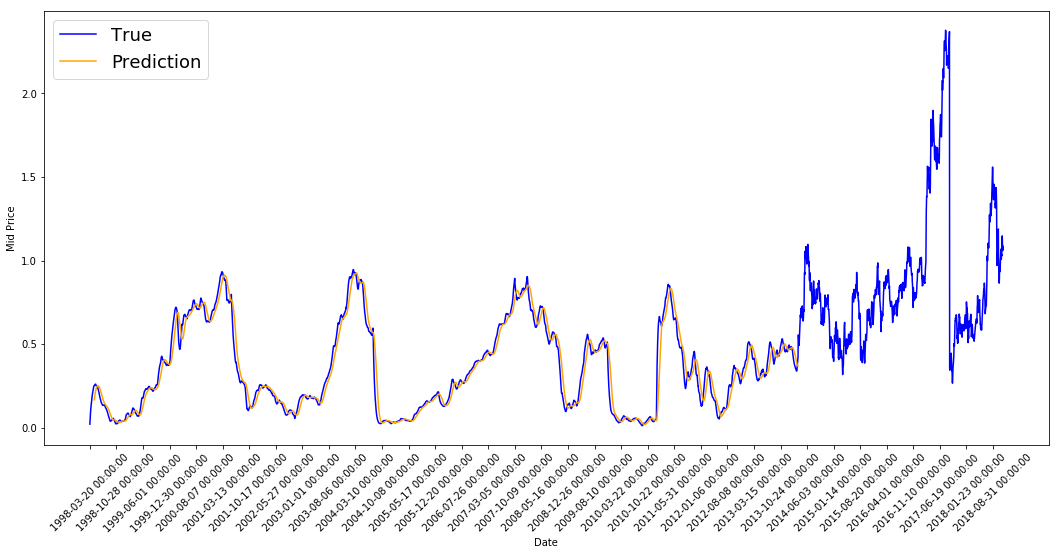

In [34]:
plt.figure(figsize = (18,8))
plt.plot(range(RELIANCE.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
plt.xticks(range(0,RELIANCE.shape[0],150),RELIANCE['Date'].loc[::150],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

So what do the above graphs (and the MSE) say?

It seems that it is not too bad of a model for very short predictions (one day ahead). Given that stock prices don't change from 0 to 100 overnight, this behavior is sensible. Next, you will look at a fancier averaging technique known as exponential moving average.

### Exponential Moving Average

You might have seen some articles on the internet using very complex models and predicting almost the exact behavior of the stock market. But beware! These are just optical illusions and not due to learning something useful. You will see below how you can replicate that behavior with a simple averaging method.

In the exponential moving average method, you calculate $x_{t+1}$ as,

xt+1 = EMAt = γ × EMAt-1 + (1-γ) xt where EMA0 = 0 and EMA is the exponential moving average value you maintain over time.
The above equation basically calculates the exponential moving average from $t+1$ time step and uses that as the one step ahead prediction. $\gamma$ decides what the contribution of the most recent prediction is to the EMA. For example, a $\gamma=0.1$ gets only 10% of the current value into the EMA. Because you take only a very small fraction of the most recent, it allows to preserve much older values you saw very early in the average. See how good this looks when used to predict one-step ahead below.

In [2]:
window_size = 25
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

NameError: name 'train_data' is not defined

### Exponential Moving Average Method's Predicted Visualization

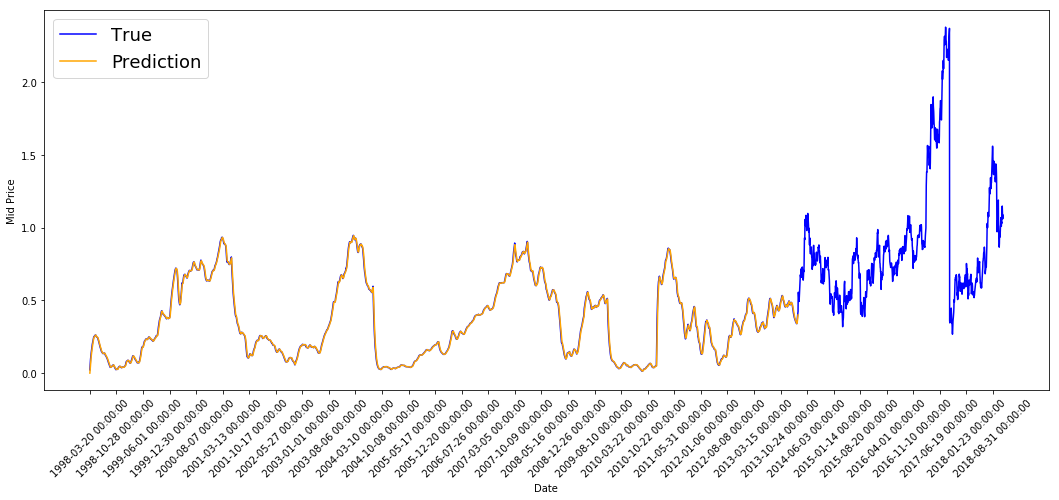

In [37]:
plt.figure(figsize = (18,7))
plt.plot(range(RELIANCE.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
plt.xticks(range(0,RELIANCE.shape[0],150),RELIANCE['Date'].loc[::150],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

###### If Exponential Moving Average is this Good, Why do You Need Better Models?

You see that it fits a perfect line that follows the True distribution (and justified by the very low MSE). Practically speaking, you can't do much with just the stock market value of the next day. Personally what I'd like is not the exact stock market price for the next day, but would the stock market prices go up or down in the next 30 days. Try to do this, and you will expose the incapability of the EMA method.

You will now try to make predictions in windows (say you predict the next 2 days window, instead of just the next day). Then you will realize how wrong EMA can go. Here is an example:

##### Predict More Than One Step into the Future

To make things concrete, let's assume values, say $x_t=0.4$, $EMA=0.5$ and $\gamma = 0.5$

Say you get the output with the following equation

Xt+1 = EMAt = γ × EMAt-1 + (1 - γ)Xt

So you have $x_{t+1} = 0.5 \times 0.5 + (1-0.5) \times 0.4 = 0.45$

So $x_{t+1} = EMA_t = 0.45$

So the next prediction $x_{t+2}$ becomes,

Xt+2 = γ × EMAt + (1-γ)Xt+1

Which is $x_{t+2} = \gamma \times EMA_t + (1-\gamma) EMA_t = EMA_t$

Or in this example, Xt+2 = Xt+1 = 0.45

So no matter how many steps you predict in to the future, you'll keep getting the same answer for all the future prediction steps.

One solution you have that will output useful information is to look at momentum-based algorithms. They make predictions based on whether the past recent values were going up or going down (not the exact values). For example, they will say the next day price is likely to be lower, if the prices have been dropping for the past days, which sounds reasonable. However, you will use a more complex model: an LSTM model.

These models have taken the realm of time series prediction by storm, because they are so good at modelling time series data. You will see if there actually are patterns hidden in the data that you can exploit.

### Introduction to LSTMs: Making Stock Movement Predictions Far into the Future

Long Short-Term Memory models are extremely powerful time-series models. They can predict an arbitrary number of steps into the future. An LSTM module (or cell) has 5 essential components which allows it to model both long-term and short-term data.

Cell state ($c_t$) - This represents the internal memory of the cell which stores both short term memory and long-term memories
Hidden state ($h_t$) - This is output state information calculated w.r.t. current input, previous hidden state and current cell input which you eventually use to predict the future stock market prices. Additionally, the hidden state can decide to only retrive the short or long-term or both types of memory stored in the cell state to make the next prediction.
Input gate ($i_t$) - Decides how much information from current input flows to the cell state
Forget gate ($f_t$) - Decides how much information from the current input and the previous cell state flows into the current cell state
Output gate ($o_t$) - Decides how much information from the current cell state flows into the hidden state, so that if needed LSTM can only pick the long-term memories or short-term memories and long-term memories

TensorFlow provides a nice sub API (called RNN API) for implementing time series models. You will be using that for your implementations.

#### Data Generator

You are first going to implement a data generator to train your model. This data generator will have a method called .unroll_batches(...) which will output a set of num_unrollings batches of input data obtained sequentially, where a batch of data is of size [batch_size, 1]. Then each batch of input data will have a corresponding output batch of data.

For example if num_unrollings=3 and batch_size=4 a set of unrolled batches it might look like,

input data: $[x_0,x_10,x_20,x_30], [x_1,x_11,x_21,x_31], [x_2,x_12,x_22,x_32]$
output data: $[x_1,x_11,x_21,x_31], [x_2,x_12,x_22,x_32], [x_3,x_13,x_23,x_33]$

#### Data Augmentation
Also to make your model robust you will not make the output for $xt$ always $x{t+1}$. Rather you will randomly sample an output from the set $x{t+1},x{t+2},\ldots,x_{t+N}$ where $N$ is a small window size.

Here you are making the following assumption:

$x{t+1},x{t+2},\ldots,x_{t+N}$ will not be very far from each other
I personally think this is a reasonable assumption for stock movement predictions.


In [38]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.02221045 0.79822415 0.5899248  0.8694905  0.04888515]

	Output: [0.06278508 0.7641764  0.4397048  0.85645795 0.0498359 ]


Unrolled index 1
	Inputs:  [0.0433346 0.7641764 0.5967571 0.8825415 0.0491819]

	Output: [0.0962996  0.7344524  0.5967571  0.85645795 0.0491819 ]


Unrolled index 2
	Inputs:  [0.06278508 0.7344524  0.5384775  0.8938613  0.0498359 ]

	Output: [0.08047207 0.70873547 0.5384775  0.8690013  0.2269047 ]


Unrolled index 3
	Inputs:  [0.08047207 0.70873547 0.4864108  0.8690013  0.05041139]

	Output: [0.08047207 0.6380499  0.4864108  0.8446257  0.3712993 ]


Unrolled index 4
	Inputs:  [0.0962996  0.684652   0.4397048  0.85645795 0.14182131]

	Output: [0.10993917 0.684652   0.35994488 0.8446257  0.3712993 ]


### Defining Hyperparameters

In this section, you'll define several hyperparameters. D is the dimensionality of the input. It's straightforward, as you take the previous stock price as the input and predict the next one, which should be 1.

Then you have num_unrollings, this is a hyperparameter related to the backpropagation through time (BPTT) that is used to optimize the LSTM model. This denotes how many continuous time steps you consider for a single optimization step. You can think of this as, instead of optimizing the model by looking at a single time step, you optimize the network by looking at num_unrollings time steps. The larger the better.

Then you have the batch_size. Batch size is how many data samples you consider in a single time step.

Next you define num_nodes which represents the number of hidden neurons in each cell. You can see that there are three layers of LSTMs in this example.

In [39]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

### Defining Inputs and Outputs

Next you define placeholders for training inputs and labels. This is very straightforward as you have a list of input placeholders, where each placeholder contains a single batch of data. And the list has num_unrollings placeholders, that will be used at once for a single optimization step.

In [40]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

### Defining Parameters of the LSTM and Regression layer

You will have a three layers of LSTMs and a linear regression layer, denoted by w and b, that takes the output of the last Long Short-Term Memory cell and output the prediction for the next time step. You can use the MultiRNNCell in TensorFlow to encapsulate the three LSTMCell objects you created. Additionally, you can have the dropout implemented LSTM cells, as they improve performance and reduce overfitting.

In [41]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

### Calculating LSTM output and Feeding it to the regression layer to get final prediction

In [42]:
# Create cell state and hidden state variables to maintain the state of the LSTM

c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

### Loss Calculation and Optimizer

In [43]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


### Prediction Related Calculations

In [44]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


### Running the LSTM

Here you will train and predict stock price movements for several epochs and see whether the predictions get better or worse over time. You follow the following procedure.

Define a test set of starting points (test_points_seq) on the time series to evaluate the model on
For each epoch
For full sequence length of training data
Unroll a set of num_unrollings batches
Train the neural network with the unrolled batches
Calculate the average training loss
For each starting point in the test set
Update the LSTM state by iterating through the previous num_unrollings data points found before the test point
Make predictions for n_predict_once steps continuously, using the previous prediction as the current input
Calculate the MSE loss between the n_predict_once points predicted and the true stock prices at those time stamps

In [45]:

epochs = 50

valid_summary = 1 # Interval you make test predictions

n_predict_once = 40 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data


train_mse_ot = [] # Accumulate Train losses
test_mse_ot = []  # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions


session = tf.InteractiveSession()


tf.global_variables_initializer().run()


# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2    # If the test error hasn't increased in this many steps, decrease learning rate


print('Initialized')
average_loss = 0


# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)


x_axis_seq = []


# Points you start your test predictions from
test_points_seq = np.arange(4000,5100,30).tolist()


for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

Initialized
Average loss at step 1: 3.672136
	Test MSE: 0.28597
	Finished Predictions
Average loss at step 2: 0.785372
	Test MSE: 0.10636
	Finished Predictions
Average loss at step 3: 0.480957
	Test MSE: 0.08135
	Finished Predictions
Average loss at step 4: 0.242033
	Test MSE: 0.04573
	Finished Predictions
Average loss at step 5: 0.187174
	Test MSE: 0.06483
	Finished Predictions
Average loss at step 6: 0.173957
	Test MSE: 0.04563
	Finished Predictions
Average loss at step 7: 0.161597
	Test MSE: 0.04966
	Finished Predictions
Average loss at step 8: 0.152968
	Test MSE: 0.05315
	Finished Predictions
Average loss at step 9: 0.124417
	Decreasing learning rate by 0.5
	Test MSE: 0.04879
	Finished Predictions
Average loss at step 10: 0.118001
	Test MSE: 0.05374
	Finished Predictions
Average loss at step 11: 0.112674
	Test MSE: 0.05163
	Finished Predictions
Average loss at step 12: 0.110743
	Decreasing learning rate by 0.5
	Test MSE: 0.05391
	Finished Predictions
Average loss at step 13: 0.1067

### Visualizing the Predictions

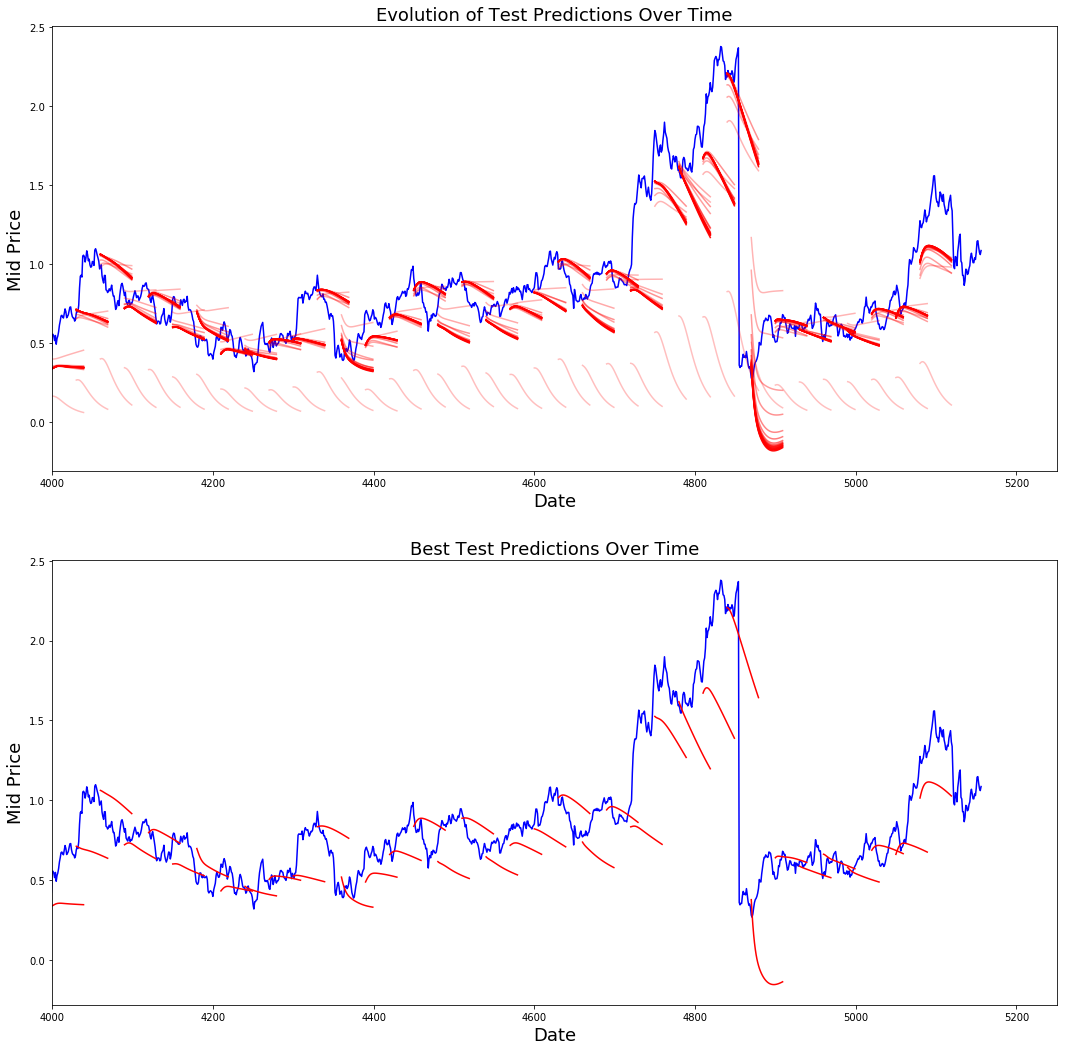

In [46]:
### replace this with the epoch that you got the best results when running the plotting code
best_prediction_epoch = 30   
plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(RELIANCE.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])
       
plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(4000,5250)
plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(RELIANCE.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')
  
plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(4000,5250)
plt.show()

Though not perfect, LSTMs seem to be able to predict stock price behavior correctly most of the time. Note that you are making predictions roughly in the range of 0 and 1.0 (that is, not the true stock prices). This is okay, because you're predicting the stock price movement, not the prices themselves.

## Tata Motors Limited Daily stock Data

In [65]:
TATAMOTORS = quandl.get("NSE/TATAMOTORS", authtoken="gmN2xKGChq4zRr3b7wNm")

In [66]:
TATAMOTORS.reset_index(inplace = True)

In [67]:
TATAMOTORS.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2003-12-26,435.80,440.5,431.65,438.85,438.60,1534637.0,6714.66
1,2003-12-29,441.00,449.7,441.00,448.40,447.80,2125952.0,9497.72
2,2003-12-30,450.00,451.9,430.10,444.85,442.40,2683293.0,11894.85
3,2003-12-31,446.00,459.3,443.55,452.10,452.05,4311596.0,19551.42
4,2004-01-01,453.25,457.9,451.50,454.00,454.45,2077604.0,9457.51


In [68]:
TATAMOTORS.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
3702,2018-11-20,184.05,188.30,183.20,183.75,183.75,13114982.0,24311.51
3703,2018-11-21,184.40,186.75,183.75,184.05,184.15,8097107.0,14964.51
3704,2018-11-22,185.50,186.15,181.75,182.50,182.55,9135857.0,16765.50
3705,2018-11-26,183.90,184.45,177.00,182.00,181.75,9865426.0,17758.79
3706,2018-11-27,181.70,184.55,178.55,180.05,180.05,11639680.0,21112.18


## We find the following information about the columns in a Data:

#### Date - Date for which the price is given
#### Open - Price of the stock at market open (In USD)
#### High - Highest price reached in the day
#### Low - Lowest price reached in the day
#### Close - Closing price for the day
#### Total Trade Quantity - Number of shares Traded Quantity
#### Turnover (Lacs) - total turnover

### Tata Motors Stock DataSet Summary

In [69]:
TATAMOTORS.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3.707000e+03,3707.000000
mean,520.522619,529.110561,510.612153,519.638764,519.654370,5.763691e+06,23780.603272
std,252.757030,256.514016,248.108699,252.329418,252.241867,5.915474e+06,19354.322656
min,126.100000,131.600000,124.800000,126.450000,126.200000,1.235100e+04,37.100000
25%,346.125000,353.675000,338.725000,345.525000,345.725000,2.114862e+06,12534.200000
50%,454.700000,460.950000,446.500000,453.400000,453.400000,4.448871e+06,21310.650000
75%,681.725000,697.450000,668.100000,682.625000,682.975000,7.580943e+06,30398.410000
max,1361.000000,1382.000000,1347.000000,1362.000000,1365.150000,1.427603e+08,506294.350000


### Tata Motors Stock Dataset Structure or Information

In [70]:
TATAMOTORS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3707 entries, 0 to 3706
Data columns (total 8 columns):
Date                    3707 non-null datetime64[ns]
Open                    3707 non-null float64
High                    3707 non-null float64
Low                     3707 non-null float64
Last                    3707 non-null float64
Close                   3707 non-null float64
Total Trade Quantity    3707 non-null float64
Turnover (Lacs)         3707 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 231.8 KB


### Convert Date Column into Datatime format

In [72]:
TATAMOTORS.Date = pd.to_datetime(TATAMOTORS.Date)

### Getting the missing Values

In [73]:
TATAMOTORS.isnull().sum()


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

### Dimension of the Dataset

In [74]:
TATAMOTORS.shape

(3707, 8)

## Data Visualization

#### TataMoters Closing Price

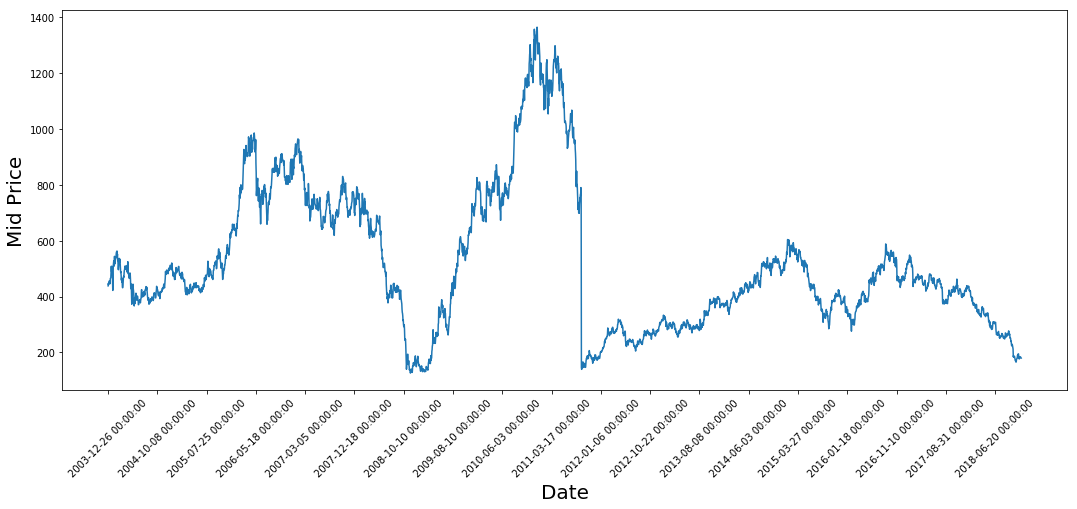

In [75]:
plt.figure(figsize = (18,7))
plt.plot(range(TATAMOTORS.shape[0]),(TATAMOTORS['Close']))
plt.xticks(range(0,TATAMOTORS.shape[0],200),TATAMOTORS['Date'].loc[::200],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Mid Price',fontsize=20)
plt.show()

#### Tata Moters Mid Price

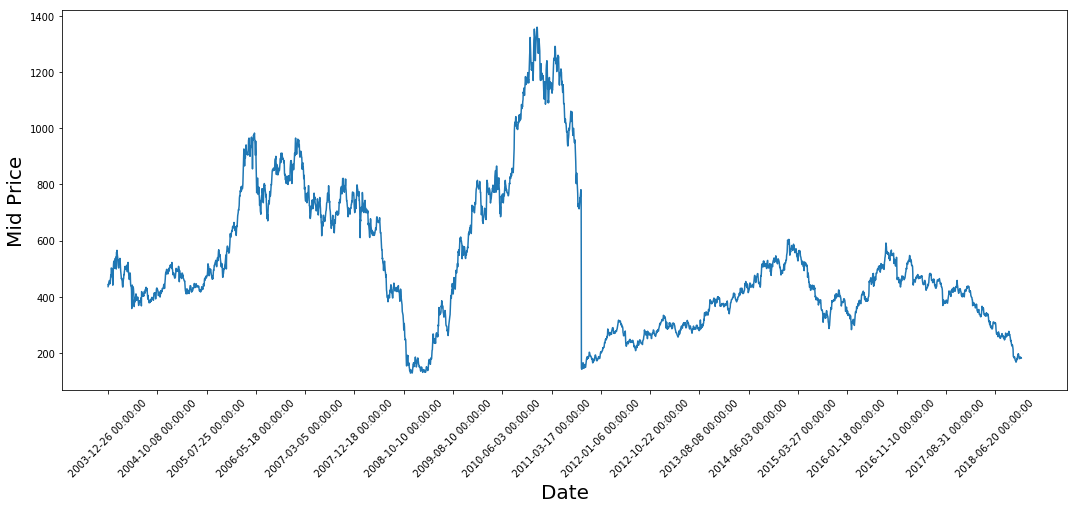

In [76]:
plt.figure(figsize = (18,7))
plt.plot(range(TATAMOTORS.shape[0]),(TATAMOTORS['Low']+TATAMOTORS['High'])/2.0)
plt.xticks(range(0,TATAMOTORS.shape[0],200),TATAMOTORS['Date'].loc[::200],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Mid Price',fontsize=20)
plt.show()

## Splitting Data into a Training set and a Test set

### You will use the mid price calculated by taking the average of the highest and lowest recorded prices on a day.

In [88]:
# First calculate the mid prices from the highest and lowest

t_high_prices = TATAMOTORS.loc[:,'High'].as_matrix()
t_low_prices = TATAMOTORS.loc[:,'Low'].as_matrix()
t_mid_prices = (t_high_prices+t_low_prices)/2.0

C:\Users\NitinKhandare\AppData\Local\Continuum\anaconda3\envs\ANN\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NitinKhandare\AppData\Local\Continuum\anaconda3\envs\ANN\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [ ]:
### Now you can split the training data and test data. 
### The training data will be the first 2,800 data points of the time series and rest will be test data.

In [89]:
t_train_data = t_mid_prices[:2800]
t_test_data = t_mid_prices[2800:]

### Normalizing the Data

In [ ]:
### Now you need to define a scaler to normalize the data. MinMaxScalar scales all the data to be in the region of 0 and 1. 
### You can also reshape the training and test data to be in the shape [data_size, num_features]

In [91]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
t_train_data = t_train_data.reshape(-1,1)
t_test_data = t_test_data.reshape(-1,1)

In [92]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 600
for di in range(0,2400,smoothing_window_size):
    scaler.fit(t_train_data[di:di+smoothing_window_size,:])
    t_train_data[di:di+smoothing_window_size,:] = scaler.transform(t_train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(t_train_data[di+smoothing_window_size:,:])
t_train_data[di+smoothing_window_size:,:] = scaler.transform(t_train_data[di+smoothing_window_size:,:])

In [93]:
# Reshape both train and test data
t_train_data = t_train_data.reshape(-1)

# Normalize test data
t_test_data = scaler.transform(t_test_data).reshape(-1)

In [94]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(2800):
  EMA = gamma*t_train_data[ti] + (1-gamma)*EMA
  t_train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([t_train_data,t_test_data],axis=0)

### One-Step Ahead Prediction via Averaging

### Standard Average Method

In [95]:
window_size = 20
N = t_train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = TATAMOTORS.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(t_train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-t_train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.00089


### Tata Stock Standard Average Method Predicted Visualization

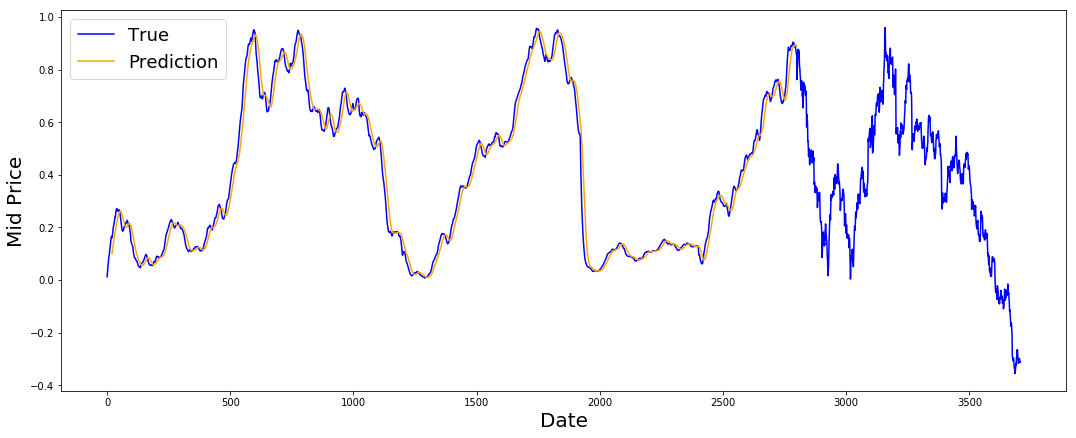

In [98]:

plt.figure(figsize = (18,7))
plt.plot(range(TATAMOTORS.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,TATAMOTORS.shape[0],50),TATAMOTORS['Date'].loc[::50],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Mid Price',fontsize=20)
plt.legend(fontsize=18)
plt.show()

### Exponential Moving Average Method Prediction

In [99]:
window_size = 30
N = t_train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*t_train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-t_train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00005


### Tata Stock's Exponential Moving Average Method Predicted Visualization

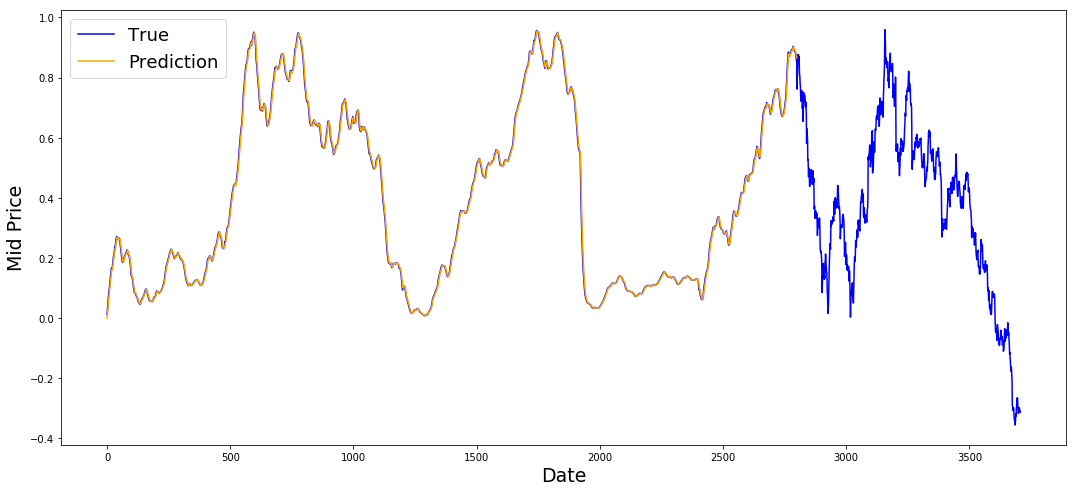

In [103]:
plt.figure(figsize = (18,8))
plt.plot(range(TATAMOTORS.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date',fontsize=19)
plt.ylabel('Mid Price',fontsize=19)
plt.legend(fontsize=18)
plt.show()

## Introduction to LSTMs: Making Stock Movement Predictions Far into the Future

In [104]:

class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.02221045 0.79822415 0.5899248  0.8694905  0.04888515]

	Output: [0.08047207 0.7641764  0.4397048  0.8938613  0.04888515]


Unrolled index 1
	Inputs:  [0.0433346 0.7641764 0.5967571 0.8825415 0.0491819]

	Output: [0.08047207 0.7344524  0.39744088 0.8825415  0.0491819 ]


Unrolled index 2
	Inputs:  [0.06278508 0.7344524  0.5384775  0.8938613  0.0498359 ]

	Output: [0.10993917 0.684652   0.35994488 0.8446257  0.2269047 ]


Unrolled index 3
	Inputs:  [0.08047207 0.70873547 0.4864108  0.8690013  0.05041139]

	Output: [0.13223024 0.6604256  0.39744088 0.8345265  0.3712993 ]


Unrolled index 4
	Inputs:  [0.0962996  0.684652   0.4397048  0.85645795 0.14182131]

	Output: [0.12225261 0.6380499  0.32605937 0.85645795 0.30421424]


### Defining Hyperparameters

In [105]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

### Defining Inputs and Outputs

In [106]:
# Input data.
t_train_inputs, t_train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    t_train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='t_train_inputs_%d'%ui))
    t_train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 't_train_outputs_%d'%ui))

### Defining Parameters of the LSTM and Regression layer

In [107]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

### Calculating LSTM output and Feeding it to the regression layer to get final prediction

#### Create cell state and hidden state variables to maintain the state of the LSTM

In [108]:
# Create cell state and hidden state variables to maintain the state of the LSTM

c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in t_train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

### Loss Calculation and Optimizer

#### When calculating the loss you need to be careful about the exact form, because you calculate
####  loss of all the unrolled steps at the same time
#### Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps


In [109]:

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-t_train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


### Prediction Related Calculations

In [110]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


### Running the LSTM

In [ ]:
epochs = 50
valid_summary = 1 # Interval you make test predictions

n_predict_once = 20 # Number of steps you continously predict for

t_train_seq_length = t_train_data.size # Full length of the training data

t_train_mse_ot = [] # Accumulate Train losses
t_test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(t_train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(2800,2900,5).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(t_train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[t_train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[t_train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(t_train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      t_train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      t_test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

### Visualizing the Predictions

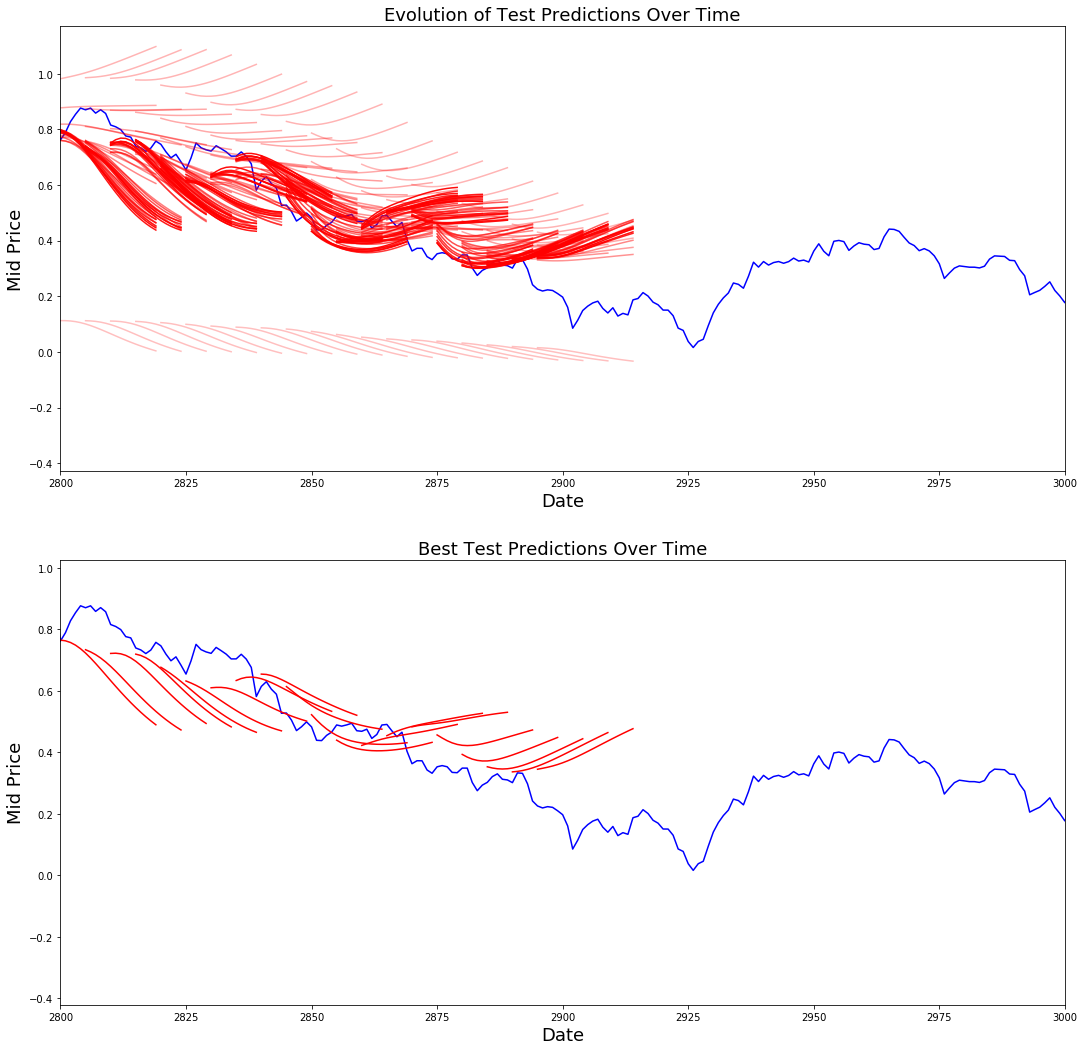

In [123]:
# replace this with the epoch that you got the best results when running the plotting code

best_prediction_epoch = 20 

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(TATAMOTORS.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha

start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(2800,3000)

plt.subplot(2,1,2)

# Predicting the best test prediction you got

plt.plot(range(TATAMOTORS.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(2800,3000)
plt.show()

### Infosys Limited Daily Stock Data

In [56]:
INFY = quandl.get("NSE/INFY", authtoken="gmN2xKGChq4zRr3b7wNm")

### Jubilant Foodworks Limited Daily Stock Data

In [57]:
JUBLFOOD = quandl.get("NSE/JUBLFOOD", authtoken="gmN2xKGChq4zRr3b7wNm")

### Tata Consultancy Services Limited Daily Stock Data

In [58]:
TCS = quandl.get("NSE/TCS", authtoken="gmN2xKGChq4zRr3b7wNm")